In [1]:
#Importing california housing dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
cal=fetch_california_housing()
housing=pd.DataFrame(cal.data,columns=cal.feature_names)

In [3]:
housing["target"]=cal.target

In [4]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
#cleaning the data and preprocessing
housing.drop(["Latitude","Longitude"],inplace=True,axis=1)

In [7]:
#function for finding the highly correlated features-
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [8]:
correlation(housing,0.7)

{'AveBedrms'}

In [9]:
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


In [11]:
housing.drop(correlation(housing,0.7),axis=1,inplace=True)

In [12]:
housing.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,target
0,8.3252,41.0,6.984127,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,3.422


In [13]:
# as it is a decision tree regressor no need to scale the data 
#splitting the DATA into training and testing split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing.drop("target",axis=1),housing.target,random_state=100,test_size=0.3)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14448, 5), (6192, 5), (14448,), (6192,))

In [41]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(ccp_alpha=0.0001,max_depth=5,max_leaf_nodes=6)

In [42]:
model.get_params()

{'ccp_alpha': 0.0001,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [44]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0001, max_depth=5, max_leaf_nodes=6)

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.5, 0.875, 'x[0] <= 5.086\nsquared_error = 1.334\nsamples = 14448\nvalue = 2.076'),
 Text(0.2, 0.625, 'x[0] <= 3.126\nsquared_error = 0.849\nsamples = 11486\nvalue = 1.75'),
 Text(0.1, 0.375, 'squared_error = 0.585\nsamples = 5757\nvalue = 1.384'),
 Text(0.3, 0.375, 'x[4] <= 2.404\nsquared_error = 0.843\nsamples = 5729\nvalue = 2.118'),
 Text(0.2, 0.125, 'squared_error = 1.263\nsamples = 1429\nvalue = 2.823'),
 Text(0.4, 0.125, 'squared_error = 0.484\nsamples = 4300\nvalue = 1.884'),
 Text(0.8, 0.625, 'x[0] <= 6.874\nsquared_error = 1.212\nsamples = 2962\nvalue = 3.339'),
 Text(0.7, 0.375, 'x[4] <= 2.743\nsquared_error = 0.895\nsamples = 2057\nvalue = 2.947'),
 Text(0.6, 0.125, 'squared_error = 0.996\nsamples = 861\nvalue = 3.418'),
 Text(0.8, 0.125, 'squared_error = 0.548\nsamples = 1196\nvalue = 2.608'),
 Text(0.9, 0.375, 'squared_error = 0.784\nsamples = 905\nvalue = 4.232')]

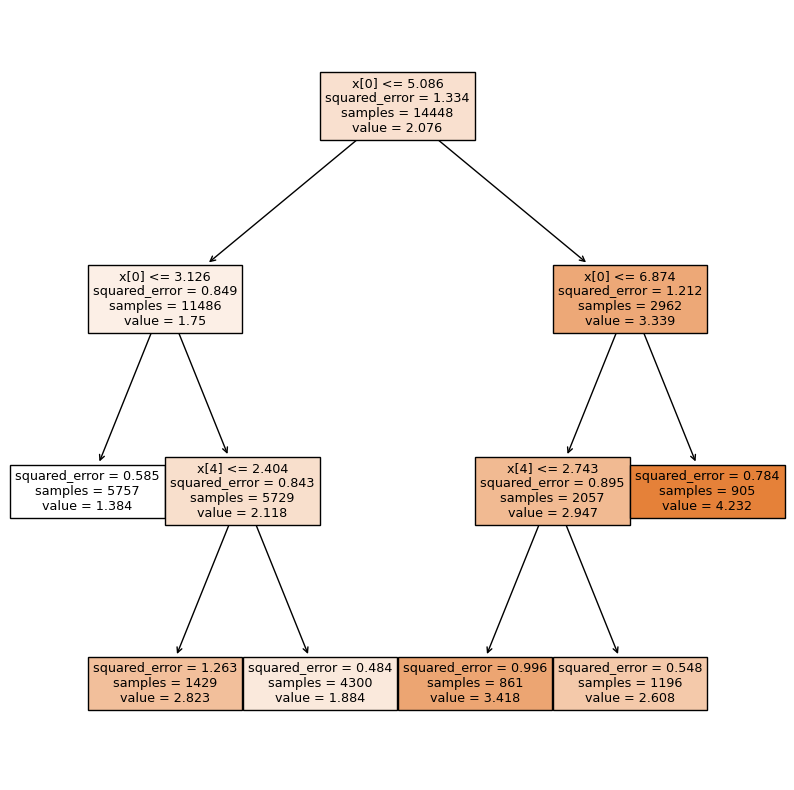

In [46]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)

In [47]:
from sklearn.metrics import r2_score,mean_squared_error

In [48]:
y_pred=model.predict(X_test)

In [49]:
mean_squared_error(y_test,y_pred)

0.6453493361073466

In [50]:
r2_score(y_test,y_pred)

0.5127437672477018